<a href="https://colab.research.google.com/github/Bharathidasan-datascientist/bharathi/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
np.random.seed(7) # seeding random number generator

In [39]:
df=pd.read_csv('//content//amazon.csv')

In [40]:
df.head(2)

,id,name,asins,brand,categories,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman


In [41]:
for cols in df.columns:
  print(cols)

id
name
asins
brand
categories
manufacturer
reviews.date
reviews.dateAdded
reviews.dateSeen
reviews.didPurchase
reviews.doRecommend
reviews.id
reviews.numHelpful
reviews.rating
reviews.sourceURLs
reviews.text
reviews.title
reviews.userCity
reviews.userProvince
reviews.username


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34659 entries, 0 to 34658
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34659 non-null  object 
 1   name                  27899 non-null  object 
 2   asins                 34657 non-null  object 
 3   brand                 34659 non-null  object 
 4   categories            34659 non-null  object 
 5   manufacturer          34659 non-null  object 
 6   reviews.date          34620 non-null  object 
 7   reviews.dateAdded     24039 non-null  object 
 8   reviews.dateSeen      34659 non-null  object 
 9   reviews.didPurchase   1 non-null      object 
 10  reviews.doRecommend   34065 non-null  object 
 11  reviews.id            1 non-null      float64
 12  reviews.numHelpful    34130 non-null  float64
 13  reviews.rating        34626 non-null  float64
 14  reviews.sourceURLs    34659 non-null  object 
 15  reviews.text       

In [43]:
df.head(4)

,id,name,asins,brand,categories,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks


In [44]:
df["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [50]:
asins_unique=len(df["asins"].unique())

In [51]:
print(asins_unique)

42


In [52]:
# Visualising the numerical variables

<function matplotlib.pyplot.show>

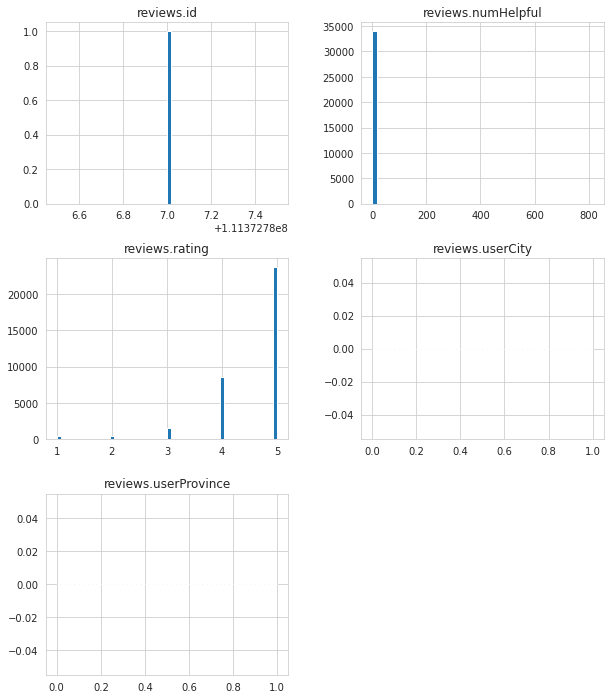

In [53]:
df.hist(bins=50,figsize=(10,12))
plt.show

In [54]:
from sklearn.model_selection import StratifiedShuffleSplit

In [55]:
print("before {}".format(len(df)))

before 34659


In [56]:
dataafter=df.dropna(subset=["reviews.rating"])
print("after{}".format(len(dataafter)))

after34626


In [58]:
dataafter.head(2)

,id,name,asins,brand,categories,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman


In [59]:
dataafter["reviews.rating"]=dataafter["reviews.rating"].astype(int)

In [60]:
dataafter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34658
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34626 non-null  object 
 1   name                  27867 non-null  object 
 2   asins                 34624 non-null  object 
 3   brand                 34626 non-null  object 
 4   categories            34626 non-null  object 
 5   manufacturer          34626 non-null  object 
 6   reviews.date          34597 non-null  object 
 7   reviews.dateAdded     24039 non-null  object 
 8   reviews.dateSeen      34626 non-null  object 
 9   reviews.didPurchase   1 non-null      object 
 10  reviews.doRecommend   34065 non-null  object 
 11  reviews.id            1 non-null      float64
 12  reviews.numHelpful    34130 non-null  float64
 13  reviews.rating        34626 non-null  int64  
 14  reviews.sourceURLs    34626 non-null  object 
 15  reviews.text       

In [64]:
split=StratifiedShuffleSplit(n_splits=5,test_size=0.2)
for train_index,test_index in split.split(dataafter,dataafter['reviews.rating']):
  strat_train=dataafter.reindex(train_index)
  strat_test=dataafter.reindex(test_index)

In [66]:
print(len(strat_train))
print(len(strat_test))

27700
6926


In [67]:
print(strat_test['reviews.rating'].value_counts()/len(strat_test))

5.0    0.683945
4.0    0.250505
3.0    0.043893
2.0    0.011118
1.0    0.009962
Name: reviews.rating, dtype: float64


In [68]:
reviews=strat_train.copy()
print(reviews)

                         id  ... reviews.username
25675  AVpfl8cLLJeJML43AE3S  ...          GeekDad
27458  AVpfl8cLLJeJML43AE3S  ...        Aljacinc1
25964  AVpfl8cLLJeJML43AE3S  ...           RosieD
25421  AVpfl8cLLJeJML43AE3S  ...         OlOneEar
18774  AV1YnRtnglJLPUi8IJmV  ...       Frmorrison
...                     ...  ...              ...
32553  AV1YE_muvKc47QAVgpwE  ...     Charding1974
16387  AVqVGWLKnnc1JgDc3jF1  ...             Jrod
29599  AV1YE_muvKc47QAVgpwE  ...          RudyS87
24693  AVpfl8cLLJeJML43AE3S  ...          3Keymen
24185  AVpfl8cLLJeJML43AE3S  ...             Jman

[27700 rows x 20 columns]


In [69]:
strat_train.head(3)

,id,name,asins,brand,categories,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
25675,AVpfl8cLLJeJML43AE3S,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",Amazon,2017-09-20T00:00:00.000Z,NaN,2017-09-28T00:00:00Z,NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5588528/review...,The speaker does a nice job but I wish it had ...,Great wedding present,NaN,NaN,GeekDad
27458,AVpfl8cLLJeJML43AE3S,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",Amazon,2017-02-09T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,Seemed pretty simple to set up. Thinking about...,Gift,NaN,NaN,Aljacinc1
25964,AVpfl8cLLJeJML43AE3S,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",Amazon,2017-02-18T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5588528/review...,Very helpful enjoy asking Alexa questions on h...,Entertaining,NaN,NaN,RosieD


In [70]:
print(reviews['name'].unique())

['Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'
 'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,'
 'Echo (White),,,\r\nEcho (White),,,'
 'Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,'
 'Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,'
 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta'
 nan
 'Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black,,,\r\nAmazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black,,,'
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta'
 'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,'
 'Brand New Amazon Kindle Fire 16gb 7

In [71]:
print(reviews['asins'].unique())

['B00L9EPT8O,B01E6AO69U' 'B00OQVZDJM' 'B018Y229OU' 'B00U3FPN4U'
 'B0189XYY0Q' 'B01AHB9CN2' 'B01BH83OOM' 'B00ZV9PXP2' 'B01J2G4VBG'
 'B00IOYAM4I' 'B01AHB9CYG' 'B018Y23MNM' 'B00IOY8XWQ' 'B018Y225IA'
 'B018SZT3BK' 'B00TSUGXKE' 'B00VINDBJK' 'B00REQKWGA' 'B01J4ORNHU'
 'B00QFQRELG' 'B00QL1ZN3G' 'B00LW9XOJM' 'B00QJDU3KY' 'B01BFIBRIE'
 'B018Y22BI4' 'B005PB2T2Q' 'B00UH4D8G2' 'B018Y23P7K' 'B018Y22C2Y'
 'B005PB2T0S' nan 'B018T075DC' 'B01AHB9C1E' 'B00X4WHP5E' 'B00LO29KXQ']


In [72]:
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27700 entries, 25675 to 24185
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27671 non-null  object 
 1   name                  22296 non-null  object 
 2   asins                 27669 non-null  object 
 3   brand                 27671 non-null  object 
 4   categories            27671 non-null  object 
 5   manufacturer          27671 non-null  object 
 6   reviews.date          27650 non-null  object 
 7   reviews.dateAdded     19178 non-null  object 
 8   reviews.dateSeen      27671 non-null  object 
 9   reviews.didPurchase   0 non-null      object 
 10  reviews.doRecommend   27236 non-null  object 
 11  reviews.id            0 non-null      float64
 12  reviews.numHelpful    27285 non-null  float64
 13  reviews.rating        27671 non-null  float64
 14  reviews.sourceURLs    27671 non-null  object 
 15  reviews.text   

In [74]:
print(reviews.groupby('asins')['name'].unique())

asins
B005PB2T0S               [Kindle Keyboard,,,\r\nKindle Keyboard,,,, Ama...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00IOY8XWQ               [Kindle Voyage E-reader, 6 High-Resolution Dis...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,, Echo ...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE                            [Echo (White),,,\r\nEcho (White),,,]
B00U3FPN4U         

In [84]:
different_names = reviews[reviews["asins"] ==
                          "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)
print(reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts())

Amazon Fire Tv,,,
Amazon Fire Tv,,,
Echo (White),,,
Echo (White),,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
nan
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,
New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W

In [85]:
different_names = reviews[reviews["asins"] ==
                          "B00L9EPT8O,B01E6AO69U"]["name"].unique()
print(different_names)

['Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'
 'Echo (White),,,\r\nEcho (White),,,'
 'Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,'
 'Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,'
 nan
 'Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,\r\nAmazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,'
 'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,'
 'New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,\r\nNew Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,'
 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for 

In [86]:
df.head(2)

,id,name,asins,brand,categories,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman


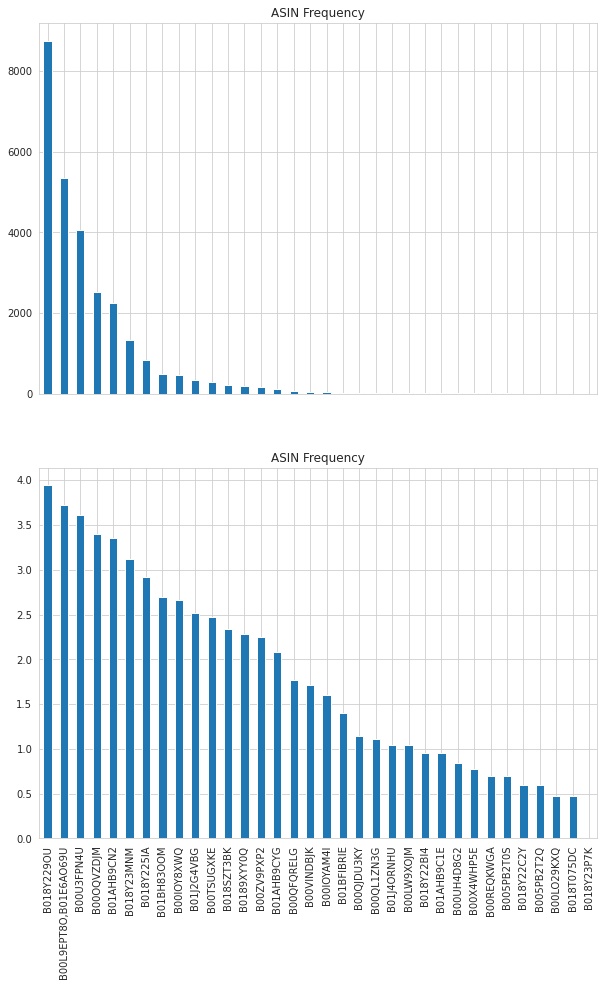

In [87]:
fig=plt.figure(figsize=(10,15))
ax1=plt.subplot(211)
ax2=plt.subplot(212,sharex=ax1)
reviews["asins"].value_counts().plot(kind="bar",ax=ax1,title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar",ax=ax2,title="ASIN Frequency")
plt.show()

In [88]:
print(reviews["reviews.rating"].mean())

4.584980665678869


In [91]:
asins_count_ix=reviews["asins"].value_counts().index

In [93]:
print(len(asins_count_ix))

34


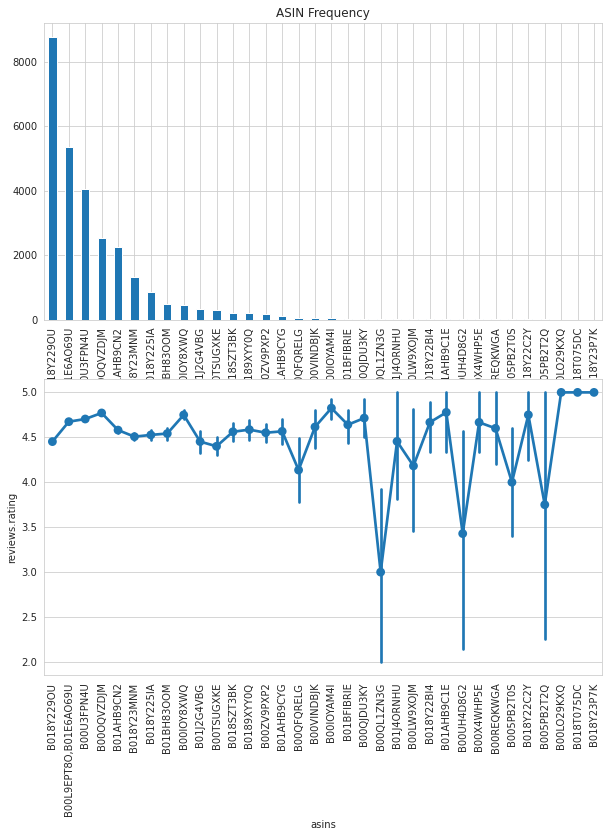

In [95]:
plt.subplots(2,1,figsize=(10,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar",title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins",y="reviews.rating",order=asins_count_ix,data=reviews)
plt.xticks(rotation=90)
plt.show()


In [96]:
def sentiments(rating):
  if (rating==5) or (rating==4):
    return "Positive"
  elif rating==3:
    return "Neutral"
  elif (rating==2) or (rating==1):
    return "Negative"

strat_train["Sentiment"]=strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"]=strat_test["reviews.rating"].apply(sentiments)
print(strat_train["Sentiment"][:10])

25675    Positive
27458    Positive
25964    Positive
25421    Positive
18774    Positive
24232    Positive
24930    Positive
25090    Positive
7354     Positive
33652    Negative
Name: Sentiment, dtype: object
